In [1]:
import os
from PIL import Image
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import string
from scipy.stats import pearsonr

In [2]:
def mse(array):
    return np.mean(array.flatten() ** 2)

In [3]:
characters = os.listdir("./images")

input_matrix = np.zeros([26, 400], dtype='float')
expected_output_matrix = np.zeros([26, 400], dtype='float')
index = 0
for character in characters:
    vector = sklearn.preprocessing.normalize(np.array(Image.open("./images/" + character)).reshape(1,-1))
    input_matrix[index] = vector
    expected_output_matrix[index] = vector
    index += 1

normalized_input = sklearn.preprocessing.normalize(input_matrix)

In [4]:
weight = np.zeros([400, 400], dtype='float')
bias = np.zeros([1, 400], dtype='float')
errors = np.zeros([26, 400], dtype='float')
mean_squared_error = 1

mse_iterations = []

learning_rate = 0.1
error_threshold = 0.000001

In [5]:
while mean_squared_error > error_threshold:
    for i in range(0, len(normalized_input)):
        a = np.dot(normalized_input[i], weight) + bias
        e = expected_output_matrix[i] - a
        errors[i] = e
        weight = weight + 2 * learning_rate * np.dot(normalized_input[i].reshape(-1, 1), e)
        bias = bias + 2 * learning_rate * e
    mean_squared_error = mse(errors)
    mse_iterations.append(mean_squared_error)

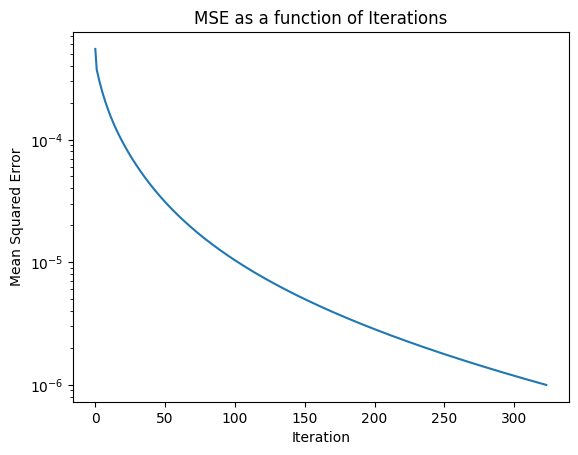

In [6]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

C:\Users\Nathan\AppData\Local\Temp\ipykernel_13764\2042740553.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)


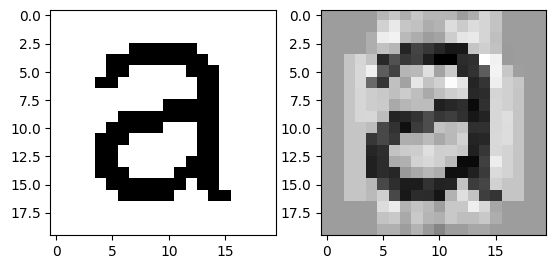

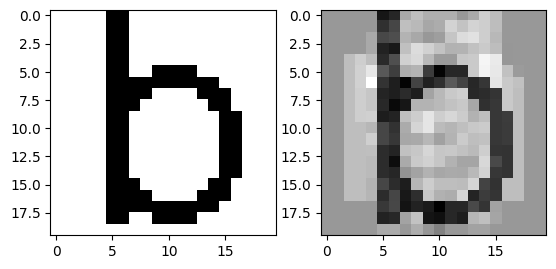

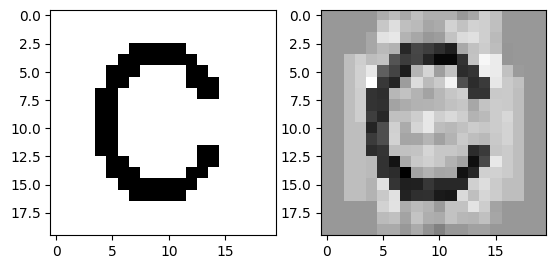

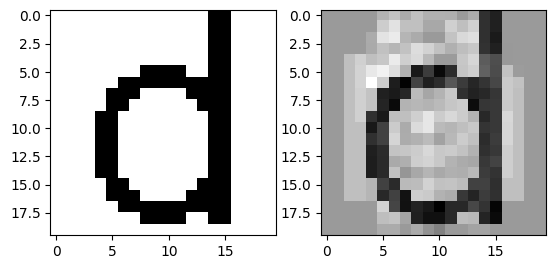

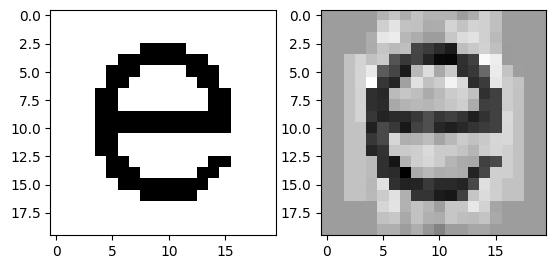

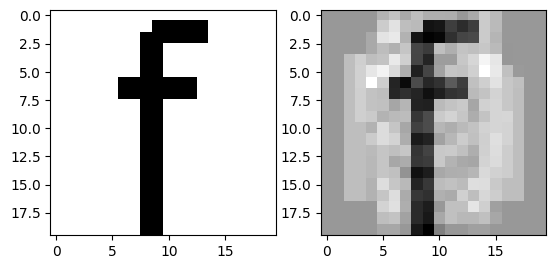

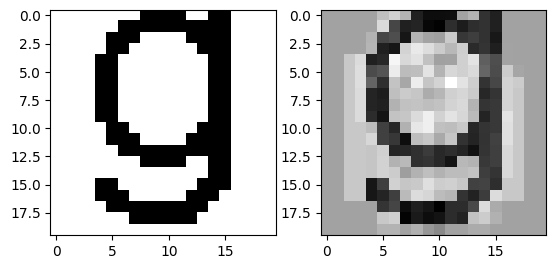

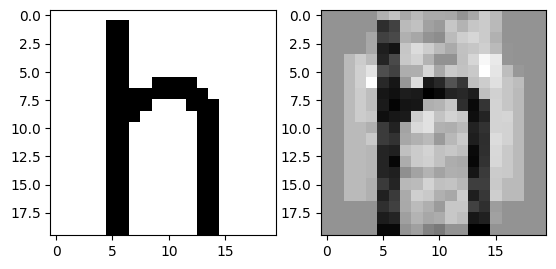

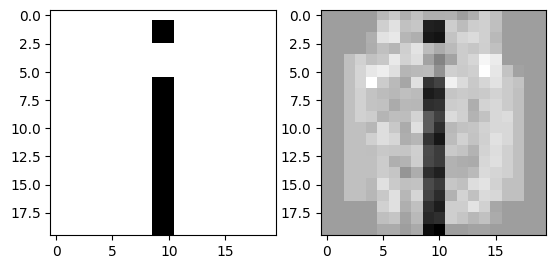

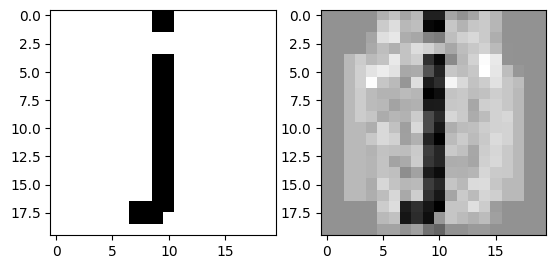

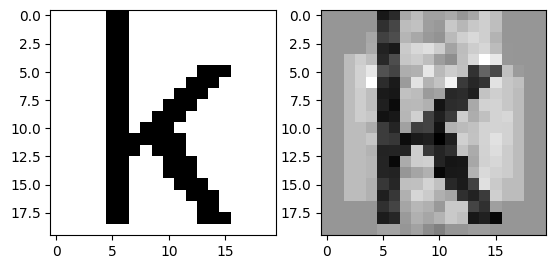

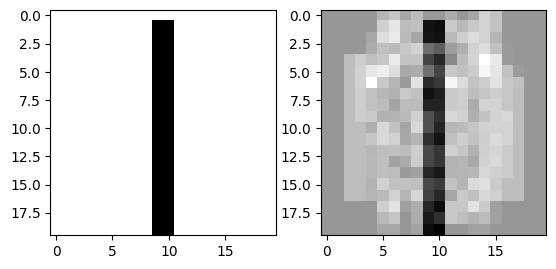

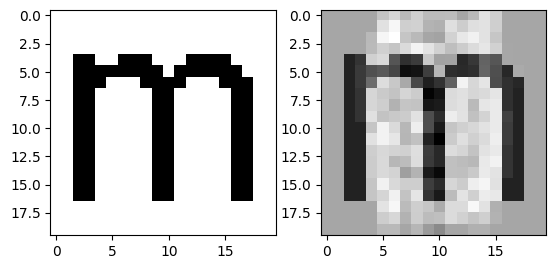

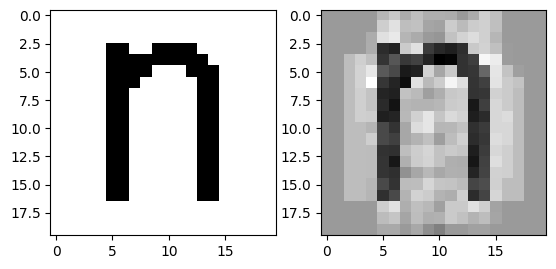

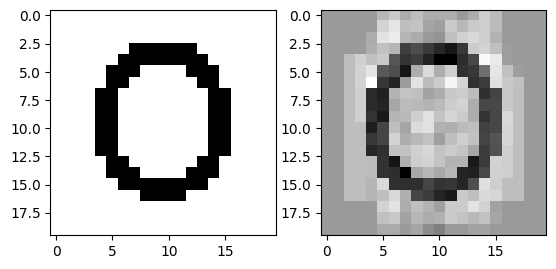

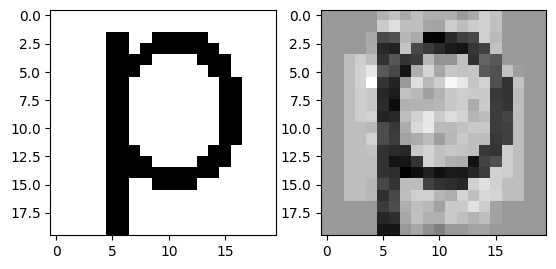

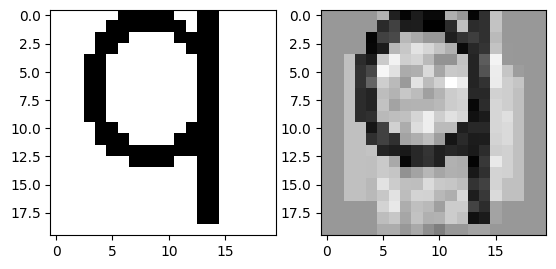

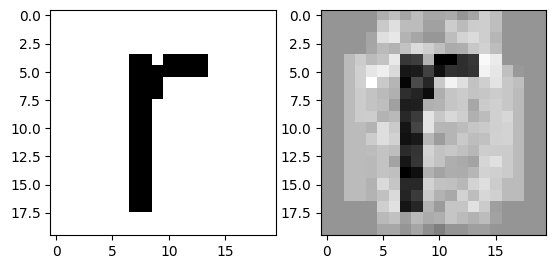

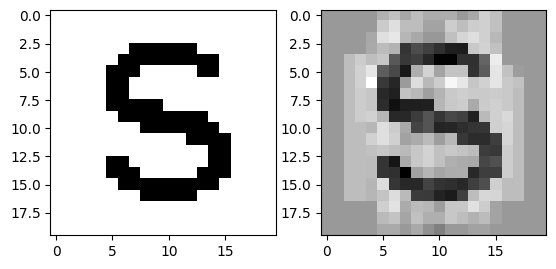

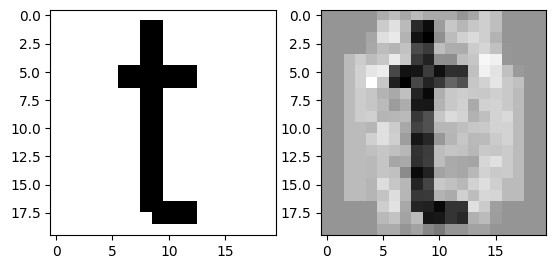

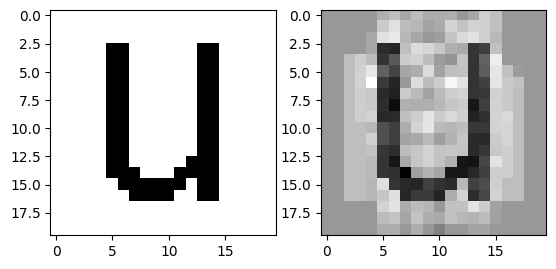

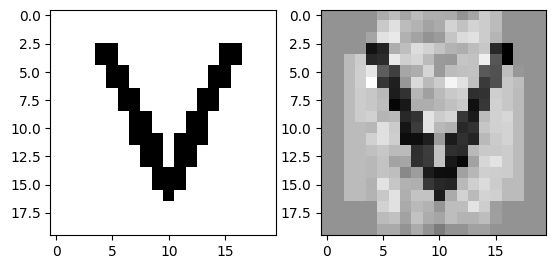

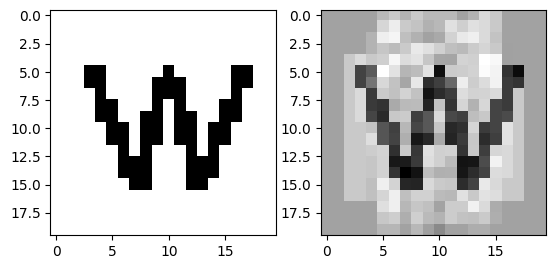

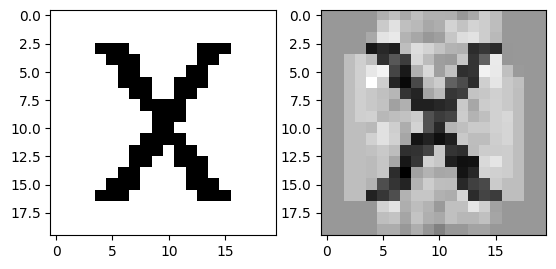

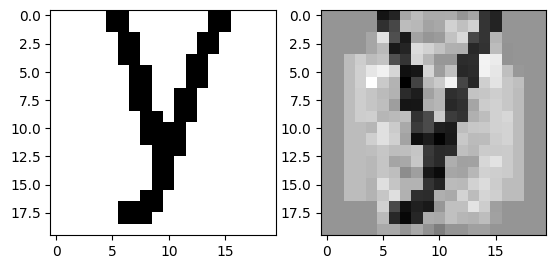

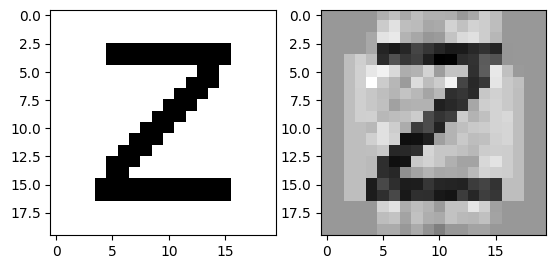

Correlation between each output and the input characters
   input         a         b         c         d         e         f         g         h         i         j         k         l         m         n         o         p         q         r         s         t         u         v         w         x         y         z
0      a  0.916743 -0.015049  0.512005  0.000557  0.530397 -0.075230 -0.164476  0.206237  0.024133  0.026351  0.146965  0.080248 -0.189955  0.553902  0.507294  0.109179  0.016381  0.150583  0.467109 -0.002836  0.550272  0.177285  0.077665  0.136852 -0.002937  0.402333
1      b  0.003936  0.922458  0.122404  0.388865  0.047025 -0.033210  0.125512  0.404158 -0.035207 -0.008071  0.291960 -0.022139 -0.254120  0.285647  0.105214  0.216310 -0.160596  0.116650 -0.026142  0.159732  0.262083 -0.034823 -0.048078  0.064935 -0.005241  0.004822
2      c  0.387186  0.006325  0.886235 -0.049650  0.519297 -0.052320 -0.252083  0.049092 -0.026505 -0.013774  0.030383  0.044834 -0.2126

In [7]:

dt = np.dtype([('input', 'U2'), ('a', 'f8'), ('b', 'f8'), ('c', 'f8'), ('d', 'f8'), ('e', 'f8'), ('f', 'f8'), ('g', 'f8'), ('h', 'f8'), ('i', 'f8'), ('j', 'f8'), ('k', 'f8'), ('l', 'f8'), ('m', 'f8'), 
               ('n', 'f8'), ('o', 'f8'), ('p', 'f8'), ('q', 'f8'), ('r', 'f8'), ('s', 'f8'), ('t', 'f8'), ('u', 'f8'), ('v', 'f8'), ('w', 'f8'), ('x', 'f8'), ('y', 'f8'), ('z', 'f8')])
table = np.zeros(26, dtype=dt)
alphabet = string.ascii_lowercase
for i in range(0, len(table)):
    actual_output = np.dot(weight, normalized_input[i])
    table[i]['input'] = alphabet[i]
    for j in range(0, len(alphabet)):
        correlation = pearsonr(actual_output, expected_output_matrix[j])
        table[i][alphabet[j]] = correlation[0]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(expected_output_matrix[i].reshape(20,20), cmap='gray')
    ax2.imshow(actual_output.reshape(20,20), cmap='gray')
    
plt.show()
    
# Set the option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000) # Adjust the display width as needed
print("Correlation between each output and the input characters")
print(pd.DataFrame(table))